In [41]:
import seaborn as sns
import pandas as pd

In [42]:
df = pd.read_csv('training_set_fd.csv', sep=';')
df.head()

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


17998
claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64
Axes(0.125,0.11;0.775x0.77)


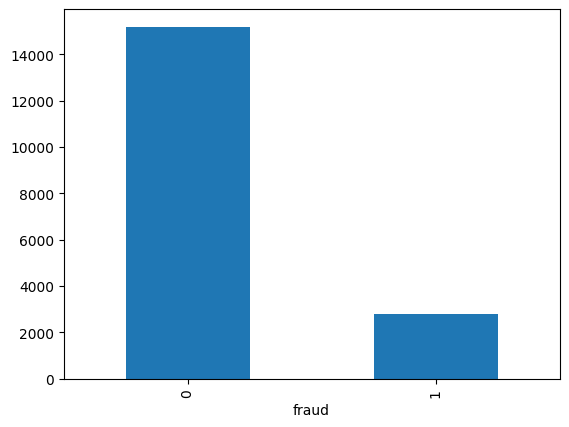

In [43]:
print(df.shape[0])
print(df.isna().sum())
print(df['fraud'].value_counts().plot.bar())

<Axes: xlabel='age_of_driver', ylabel='Count'>

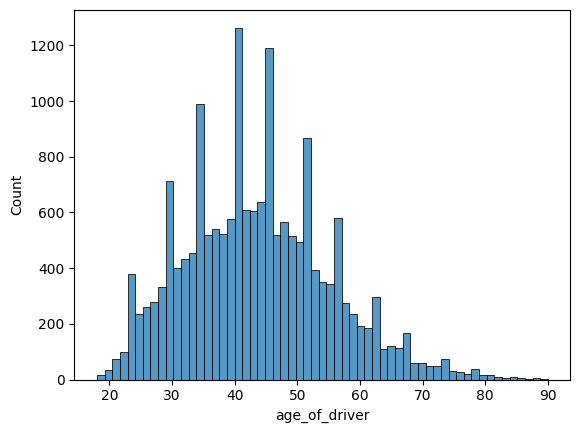

In [44]:
df_age = df[df['age_of_driver'] < 91]
sns.histplot(df_age, x='age_of_driver')

array([<Axes: ylabel='1'>], dtype=object)

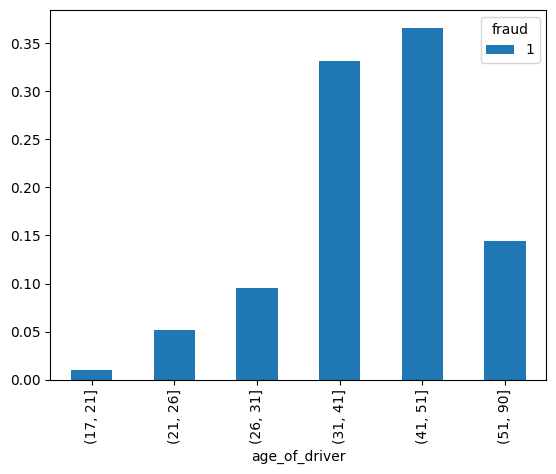

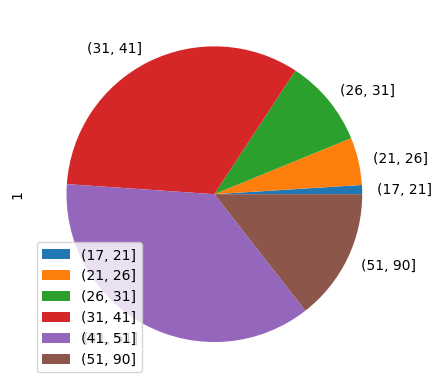

In [45]:
bins = [17,21,26,31,41,51,90]

df_age['age_of_driver'] = pd.cut(df['age_of_driver'], bins=bins)

new_df = df_age[df_age['fraud'] == 1]
(new_df.groupby(['age_of_driver','fraud']).size()/(new_df.shape[0])).unstack().plot.bar()
(new_df.groupby(['age_of_driver','fraud']).size()/(new_df.shape[0])).unstack().plot.pie(subplots=True)

over 40


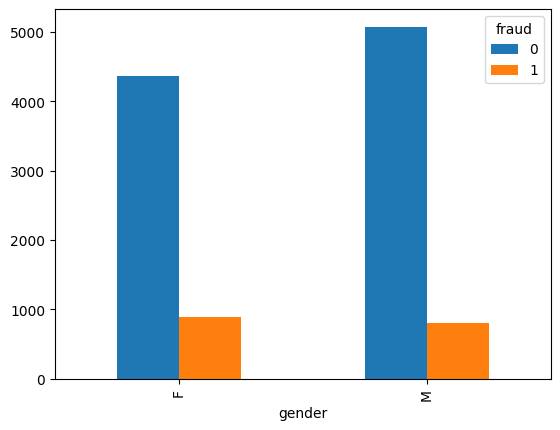

under 40


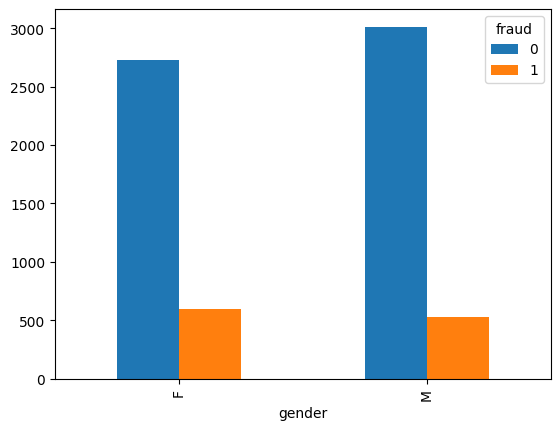

In [46]:
import matplotlib.pyplot as plt

df_over = df[df['age_of_driver'] >= 40]
df_under = df[df['age_of_driver'] < 40]

print ("over 40")
df_over.groupby(['gender','fraud']).size().unstack().plot.bar()
plt.show()
print ("under 40")
df_under.groupby(['gender','fraud']).size().unstack().plot.bar()
plt.show()


<Axes: xlabel='claim_est_payout', ylabel='Count'>

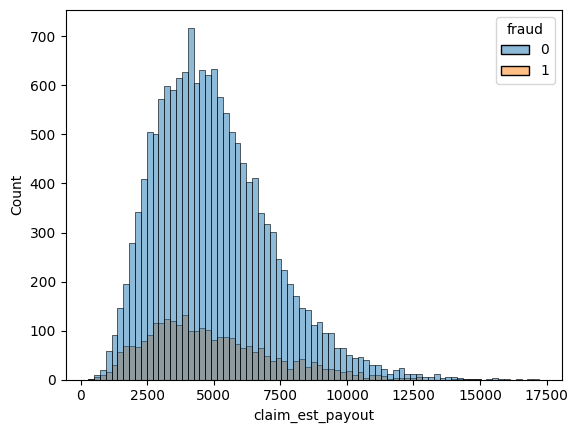

In [47]:
df_fraud = df[df['fraud'] == 1]

sns.histplot(df, x='claim_est_payout', hue='fraud')

Predizione decision tree Test: 0.23924449108079748 Train: 1.0


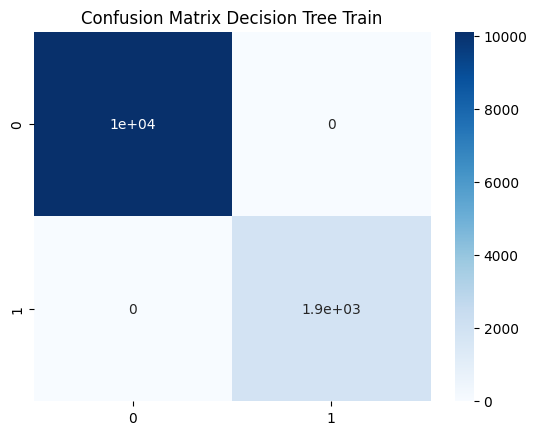

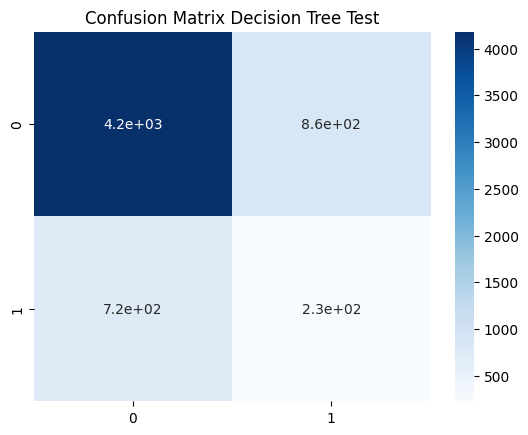

Predizione decision logistic Test: 0.0 Train: 0.0


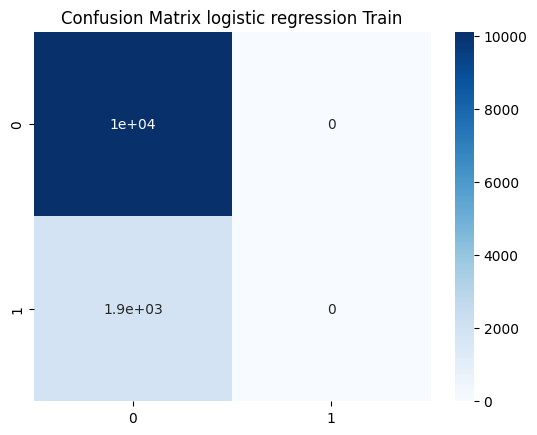

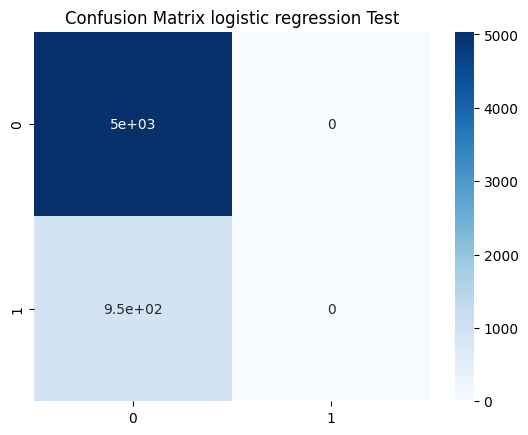

Predizione decision dummy Test: 0.0 Train: 0.0


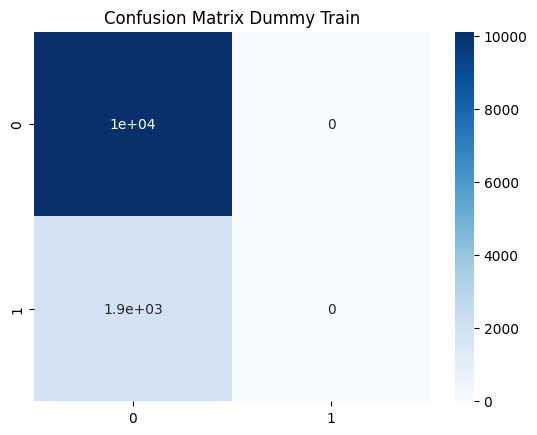

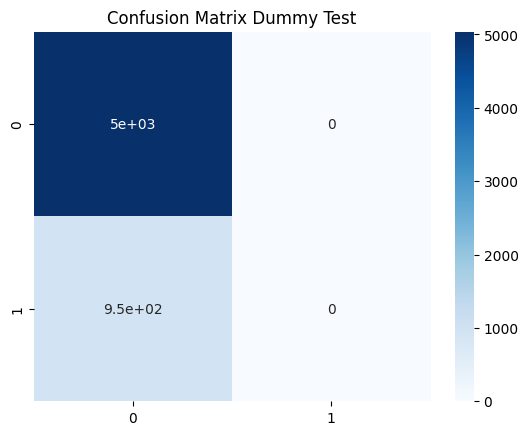

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
warnings.filterwarnings('ignore')

df = pd.read_csv('training_set_fd.csv', sep=';')

df = df.drop('claim_number', axis=1)

#elimina righe con valori mancanti
#df.dropna()



enc = OrdinalEncoder()
temp = enc.fit_transform(df)
df = pd.DataFrame(temp, columns=df.columns)

df = df.dropna()

y = df['fraud']
X = df.drop('fraud', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {recall_score(y_test, test_pred)} Train: {recall_score(y_train, train_pred)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix Decision Tree Test')
plt.show()

logre = LogisticRegression()

logre.fit(X_train, y_train)

test_pred1 = logre.predict(X_test)
train_pred1 = logre.predict(X_train)
print(f'Predizione decision logistic Test: {recall_score(y_test, test_pred1)} Train: {recall_score(y_train, train_pred1)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix logistic regression Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1), annot=True, cmap='Blues')
plt.title('Confusion Matrix logistic regression Test')
plt.show()

dummy = DummyClassifier()

dummy.fit(X_train, y_train)

test_pred2 = dummy.predict(X_test)
train_pred2 = dummy.predict(X_train)
print(f'Predizione decision dummy Test: {recall_score(y_test, test_pred2)} Train: {recall_score(y_train, train_pred2)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Test')
plt.show()


In [49]:
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=10, scoring='recall').mean())
print('Accuracy Logistic Regression con Cross Val ',cross_val_score(logre, X, y, cv=10, scoring='recall').mean())
print('Accuracy Dummy con Cross Val ',cross_val_score(dummy, X, y, cv=10, scoring='recall').mean())

Accuracy Decision Tree con Cross Val  0.2340046944801999
Accuracy Logistic Regression con Cross Val  0.009593397440751116
Accuracy Dummy con Cross Val  0.0


In [50]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [1,2,3],
    'penalty': ['l1','l2','elasticnet', None]
}

par = GridSearchCV(logre, params, scoring='accuracy')

par.fit(X_train, y_train)

pred = par.predict(X_test)

print(par.best_params_)
print('Accuracy tree test:' , accuracy_score(y_test, pred))




{'C': 2, 'penalty': 'l2'}
Accuracy tree test: 0.8409015025041736


In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, MaxAbsScaler
from sklearn.pipeline import Pipeline


trans = ColumnTransformer(transformers=[('kbin', KBinsDiscretizer(), ['claim_est_payout','vehicle_price'])])

pipe = Pipeline(steps=[('trans', trans),
                       ('maxAbs', MaxAbsScaler())])

pipe.fit(X,y)

pipeline = Pipeline(steps=[('prepo', pipe),
                           ('model', DecisionTreeClassifier())])



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

pipeline.fit(X_train,y_train)
test_pred = pipeline.predict(X_test)


print('Accuracy tree test:' , accuracy_score(y_test, test_pred))

pipeline1 = Pipeline(steps=[('prepo', pipe),
                           ('model', LogisticRegression())])



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

pipeline1.fit(X_train,y_train)
test_pred = pipeline.predict(X_test)


print('Accuracy logistic test:' , accuracy_score(y_test, test_pred))


Accuracy tree test: 0.8425709515859766
Accuracy logistic test: 0.8445742904841402


In [52]:
trans = ColumnTransformer(transformers=[('kbin', KBinsDiscretizer(n_bins=10), ['claim_est_payout','vehicle_price'])])

pipe = Pipeline(steps=[('trans', trans),
                       ('maxAbs', MaxAbsScaler())])

pipe.fit(X,y)


pipeline2 = Pipeline(steps=[('prepo', pipe),
                           ('model', LogisticRegression())])



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3)

pipeline2.fit(X_train,y_train)
test_pred = pipeline.predict(X_test)


print('Accuracy logistic test:' , accuracy_score(y_test, test_pred))

Accuracy logistic test: 0.83889816360601


In [55]:
from sklearn.feature_selection import SelectKBest

logistic = LogisticRegression()

pipe = Pipeline(steps=[
    ("k_best", SelectKBest()),
    ("bin", KBinsDiscretizer()),
    ("maxabs", MaxAbsScaler()),
    ("logistic", logistic)
])

param_grid = {
    "k_best__k": [2, 4, 5, 7, 10],
    "bin__n_bins": [2, 3, 4, 5, 6, 7]
}

search = GridSearchCV(pipe, param_grid, scoring='accuracy')
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best = search.best_params_
pipe.set_params(**best)

pipe.fit(X_train, y_train)


test_pred = pipe.predict(X_test)

print('Accuracy logistic test:' , accuracy_score(y_test, test_pred))



Best parameter (CV score=0.846):
{'bin__n_bins': 2, 'k_best__k': 2}
Accuracy logistic test: 0.83889816360601


In [65]:
from sklearn.impute import SimpleImputer

df = pd.read_csv('training_set_fd.csv', sep=';')


new_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("pipeline", pipe)
])

param_grid = {
    "imputer__strategy": ['mean', 'median', 'most_frequent'],
    "pipeline__k_best__k": [2, 4, 5, 7, 10],
    "pipeline__bin__n_bins": [2, 3, 4, 5, 6, 7]
}

search = GridSearchCV(new_pipe, param_grid, scoring='accuracy')
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_
new_pipe.set_params(**best_params)

new_pipe.fit(X_train, y_train)

test_pred = new_pipe.predict(X_test)

accuracy = accuracy_score(y_test, test_pred)
print('Accuracy logistic test:', accuracy)

Best parameter (CV score=0.846):
{'imputer__strategy': 'mean', 'pipeline__bin__n_bins': 2, 'pipeline__k_best__k': 2}
Accuracy logistic test: 0.83889816360601
